# Individual Project 

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#read csv file to import data and create respective numpy arrays for relevant data
file = pd.read_csv('hotel_bookings.csv')
cancellations = file['is_canceled'].to_numpy()
lead_times = file['lead_time'].to_numpy()
deposit = file['deposit_type'].to_numpy()

In [3]:
#clean data to exclude arrays that contain NaNs
cancellations_clean = []
lead_times_clean = []
deposit_clean = []


for i in range(len(cancellations)):
    #use numpy intrinsic function isnan to check if NaNs are present (data missing removed from analysis)
    if np.isnan(cancellations[i]) or np.isnan(lead_times[i]):
        pass
    else:
        cancellations_clean.append(cancellations[i])
        lead_times_clean.append(lead_times[i])
        deposit_clean.append(deposit[i])

In [4]:
#regroup into cancellations per month of lead time

#create arrays for relevant data per month
lead_months = np.arange(1, 27, 1)
bookings_per_month = np.zeros((len(lead_months)))
cancellations_per_month = np.zeros((len(lead_months)))
refund = np.zeros((len(lead_months)))
no_refund = np.zeros((len(lead_months)))


for j in lead_months:
    for i in range(len(cancellations_clean)):
        #find number of bookings per lead month
        if 30*(j-1) <= lead_times_clean[i] < 30*j:
            bookings_per_month[j] += 1
            #find number of bookings cancelled per lead month
            if cancellations_clean[i] == 1:
                cancellations_per_month[j-1] += 1
                #find how many of the deposits for the cancelled bookings were refundable and non refundable
                if deposit_clean[i] == 'Refundable':
                    refund[j] += 1
                elif deposit_clean[i] == 'Non Refund':
                    no_refund[j] += 1

In [5]:
#def add_subplot_axes(ax,rect,facecolor='w'): # matplotlib 2.0+
#this allows to plot a subplot inside the main plot
def add_subplot_axes(ax,rect):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]
    subax = fig.add_axes([x,y,width,height])
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

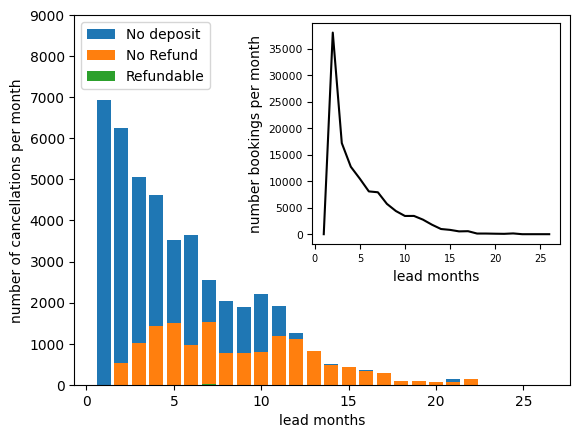

In [6]:
#plot results

#bar plot of number of cancellations per lead month and categorised into:
#no deposit given, refundable deposit, non-refundable deposit
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(lead_months, cancellations_per_month, label='No deposit')
ax.bar(lead_months, no_refund, label='No Refund')
ax.bar(lead_months, refund, label='Refundable')
ax.set_xlabel('lead months')
ax.set_ylabel('number of cancellations per month')
ax.set_ylim(0, 9000)
ax.legend(loc='upper left')

#subplot of number of bookings per lead month
subpos = [0.48,0.38,0.5,0.6]
subax = add_subplot_axes(ax, subpos)
subax.plot(lead_months, bookings_per_month, color='black')
subax.set_xlabel('lead months')
subax.set_ylabel('number bookings per month')

plt.savefig("coursework_figure.svg")

# Mini Report

How does lead time impact hotel booking cancellations, and what role do different deposit policies play in reducing cancellation rates?

This business question examines the relationship between lead time (the time between reservation and check-in) and reservation cancellation probability. It also explores how advanced deposit rules affect reservation reliability and stability.

Understanding these aspects is essential to predicting customer behavior, improving booking management, and adopting more effective revenue and hotel management strategies.

Specifically, the selected attributes are suitable for answering the research question since they allow us to understand if booking well in advance increases or reduces the risk of cancellation and how the requirement for an advance payment influences the customer's behavior.

The analysis indicates that bookings reach their zenith in the initial lead months and that cancellations are most frequent when bookings are made several months in advance and diminish as the booking date nears. Moreover, cancellations disproportionately impact non-deposit bookings, underscoring that financial commitment discourages customers from changing their plans. The results indicate that early reservations entail greater cancellation risks, particularly when a deposit is not mandated. This knowledge enables organizations to optimize pricing, overbooking policies, and deposit rules to reduce revenue loss while preserving customer flexibility. Enforcing more stringent deposit procedures for early reservations may enhance revenue stability and forecasting precision.

![coursework_figure.svg](./coursework_figure.svg)


Overall mark: 60

#### Business Question:
The business question is clearly stated and is connected to the given dataset. The reason why answering such a question is also presented. Evidences are presented in a structured way to support the findings and implications. However, the logic to reason the findings from data is not that clear. For example, it should be the number of non-deposit bookings that impact the cancellations, but not the other way round. Clearer satatment of how the findings are derived from data and more sensible reasoning logic can improve this part.

<u>Good</u>

#### Data:
Three relevant variables, cancellations, lead times and deposit are identified to answer the question, according to the code. However, the selection of variables is not explicitly addressed in the report, though some justification of the selection is provided. Appropriate data filtering and grouping are used, showing good understanding of data manipulation.

<u>Good</u>

#### Visualization:
A solid line and a bar chart are used for the visualization purpose, which is sufficient to convey the key findings and to support the further analysis. The plots come with essential elements including the title, axis lables and ticks. Necessary legends are also provided for the bar chart. However, the assoication between the x-axis, lead months and the y-axis, the number of cancellation per month, needs to be explained more clearly, as it is not straightforward from the given labels (may be using number of cancellations per lead month is more clear). In addition, for the dotted line, the outlier worths some explanations.

<u>Good</u>

#### Code:
The code is error-free and the structure is easy to follow. Useful comments are provided where necessary. Consider to use list comprehension instead of tedious for loop.

<u>Very Good</u>


